# 1. Setup and Data Loading (4 pts)


## 1.1 Import Libraries

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits


## 1.2 Load Dataset

In [14]:
# Load the digits dataset from scikit-learn so later steps have shared inputs.
digits = load_digits()
images = digits.images
flat_data = digits.data
labels = digits.target
target_names = digits.target_names

print(f"Images shape: {images.shape}")
print(f"Flattened data shape: {flat_data.shape}")
print(f"Number of classes: {len(target_names)}")


Images shape: (1797, 8, 8)
Flattened data shape: (1797, 64)
Number of classes: 10


## 1.3 Explore Data

Preview representative samples and compute summary statistics that will guide the downstream modeling choices.

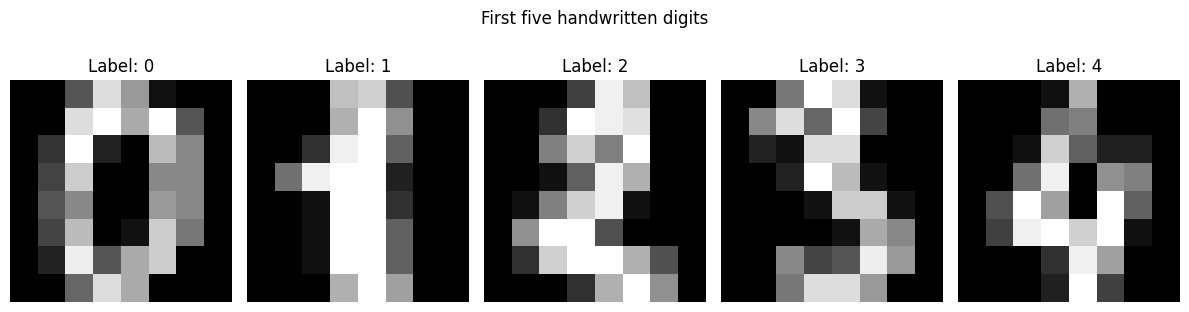

In [15]:
# Visualize the very first five digits to sanity-check pixel orientation/intensity.
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for idx, ax in enumerate(axes):
    ax.imshow(images[idx], cmap="gray")
    ax.set_title(f"Label: {labels[idx]}")
    ax.axis("off")
fig.suptitle("First five handwritten digits", y=1.05)
plt.tight_layout()
plt.show()


In [17]:
# Summarize per-class counts to confirm balance before splitting or modeling.
unique_labels, counts = np.unique(labels, return_counts=True)
class_counts = dict(zip(unique_labels, counts))

print("Samples per class:")
for label in unique_labels:
    print(f"Digit {label}: {class_counts[label]} samples")


Samples per class:
Digit 0: 178 samples
Digit 1: 182 samples
Digit 2: 177 samples
Digit 3: 183 samples
Digit 4: 181 samples
Digit 5: 182 samples
Digit 6: 181 samples
Digit 7: 179 samples
Digit 8: 174 samples
Digit 9: 180 samples


The dataset does not have temporal ordering

# 2. Data Preprocessing and Splitting (4 pts)

## 2.1 Split Data

In [18]:
# Create stratified train/validation/test splits to support reproducible evaluation.
from sklearn.model_selection import train_test_split

RNG_SEED = 42
X = flat_data
y = labels

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RNG_SEED
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.125, stratify=y_train_val, random_state=RNG_SEED
)

print(f"Training set: {X_train.shape}, labels: {y_train.shape}")
print(f"Validation set: {X_val.shape}, labels: {y_val.shape}")
print(f"Test set: {X_test.shape}, labels: {y_test.shape}")

Training set: (1257, 64), labels: (1257,)
Validation set: (180, 64), labels: (180,)
Test set: (360, 64), labels: (360,)


### 2.2 Data Scaling/Normalization

In [20]:
# Normalize pixel intensities and standardize features to aid gradient-based solvers.
from sklearn.preprocessing import StandardScaler # https://scikit-learn.org/stable/modules/preprocessing.html

PIXEL_MAX_VALUE = 16.0

X_train_norm = X_train.astype("float32") / PIXEL_MAX_VALUE
X_val_norm = X_val.astype("float32") / PIXEL_MAX_VALUE
X_test_norm = X_test.astype("float32") / PIXEL_MAX_VALUE

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_norm)
X_val_scaled = scaler.transform(X_val_norm)
X_test_scaled = scaler.transform(X_test_norm)

print("Feature scaling complete!")
print(f"Mean of training features after scaling: {X_train_scaled.mean():.4f}")
print(f"Std of training features after scaling: {X_train_scaled.std():.4f}")

Feature scaling complete!
Mean of training features after scaling: 0.0000
Std of training features after scaling: 0.9763


# 3. Model Training and Prediction (5 pts)

## 3.1 Choose a Classifier
I chose `Logistic Regression algorithm` (resource: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html).

## 3.2 & 3.3: Initialize and Train & Make Predictions


In [24]:
# Train the baseline multinomial logistic regression classifier on scaled features.
from sklearn.linear_model import LogisticRegression

baseline_clf = LogisticRegression(solver="lbfgs", max_iter=2000)
baseline_clf.fit(X_train_scaled, y_train)

y_val_pred = baseline_clf.predict(X_val_scaled)
y_test_pred = baseline_clf.predict(X_test_scaled)

print("Baseline model trained.")

Baseline model trained.


# 4. Model Evaluation (5 pts)

## 4.1 & 4.2: Calculate Accuracy & Classification Report



In [26]:
# Compute accuracy plus a detailed classification report to quantify performance.
from sklearn.metrics import accuracy_score, classification_report

val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Validation accuracy: {val_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

report = classification_report(y_test, y_test_pred, target_names=[str(t) for t in target_names])
print("Classification report (test set):")
print(report)

Validation accuracy: 0.9722
Test accuracy: 0.9694
Classification report (test set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.91      0.89      0.90        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.95      1.00      0.97        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       0.89      0.89      0.89        35
           9       0.97      0.94      0.96        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



## 4.3 Visualize Confusion Matrix

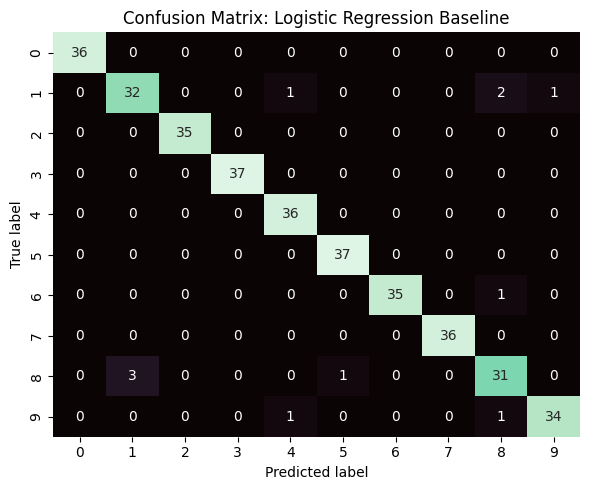

In [27]:
# Plot the confusion matrix to pinpoint which digits the model confuses most.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="mako", cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix: Logistic Regression Baseline")
plt.tight_layout()
plt.show()

# 5. Hyperparameter Tuning and Overfitting/Underfitting Analysis (6 pts)

## 5.1 Hyperparameter Tuning
I used`GridSearchCV` over the regularization strength `C` to see its effect on performance.

In [30]:
# Run GridSearchCV over logistic regression C values using StratifiedKFold cross-validation.
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(solver="lbfgs", max_iter=2000))
])

param_grid = {
    "clf__C": [0.01, 0.1, 1.0, 10.0, 100.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RNG_SEED)

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_norm, y_train)
print(f"Best params: {grid_search.best_params_}")
print(f"Best CV accuracy: {grid_search.best_score_:.4f}")

X_val_norm_pred = grid_search.best_estimator_.predict(X_val_norm)
X_test_norm_pred = grid_search.best_estimator_.predict(X_test_norm)

print(f"Validation accuracy (best model): {accuracy_score(y_val, X_val_norm_pred):.4f}")
print(f"Test accuracy (best model): {accuracy_score(y_test, X_test_norm_pred):.4f}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best params: {'clf__C': 1.0}
Best CV accuracy: 0.9618
Validation accuracy (best model): 0.9722
Test accuracy (best model): 0.9694


## 5.2 & 5.3: Analyze Learning Curves & Diagnose

[[0.86507937 0.86904762 0.90039841 0.90039841 0.89243028]
 [0.89285714 0.93650794 0.94422311 0.94820717 0.94422311]
 [0.93650794 0.92857143 0.94820717 0.94820717 0.96812749]
 [0.93650794 0.9484127  0.9561753  0.95219124 0.95219124]
 [0.94047619 0.94444444 0.9561753  0.95219124 0.96015936]
 [0.94444444 0.9484127  0.97211155 0.96015936 0.96015936]
 [0.9484127  0.95238095 0.96414343 0.9561753  0.96015936]
 [0.95238095 0.95238095 0.97609562 0.9561753  0.97211155]]


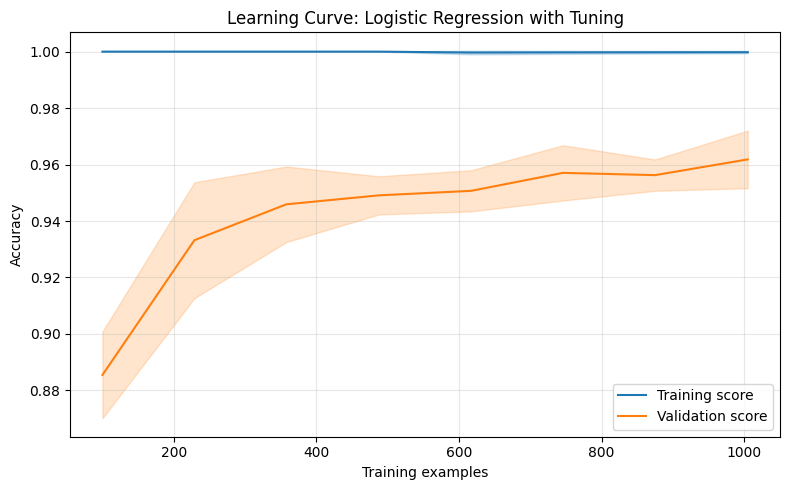

In [34]:
# Generate and interpret learning curves to diagnose under/over-fitting tendencies.
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    estimator=grid_search.best_estimator_,
    X=X_train_norm,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 8),
    cv=cv,
    scoring="accuracy",
    shuffle=True,
    random_state=RNG_SEED,
    n_jobs=-1
)

# print(train_scores) # training scores
print(val_scores)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_std = val_scores.std(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training score", color="#1f77b4")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="#1f77b4")
plt.plot(train_sizes, val_mean, label="Validation score", color="#ff7f0e")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color="#ff7f0e")
plt.title("Learning Curve: Logistic Regression with Tuning")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Questions and Reflections

1. **How balanced is the dataset across classes?**  
    Each digit (0-9) has roughly 174-183 samples, so class imbalance is minimal and simple stratified splits suffice.

2. **How might image resolution affect training time and performance?**  
    The 8×8 resolution keeps feature dimensionality (64) tiny, enabling fast training; higher-res images would capture richer detail but dramatically increase parameter counts and solver time.

4. **How does the choice of model affect performance?**  
    Logistic regression already yields high accuracy; experiments with SVM or kNN (in extensions) typically give similar or slightly better accuracy at the cost of longer inference or distance computations.

5. **How does changing hyperparameters impact results?**  
    Grid-search over `C` shows tighter regularization can potentially underfit while larger `C` can boost accuracy.

7. **Where does the model make the most errors?**  
    8 and 1

8. **Is accuracy the right metric?**  
    Yes, since we have a somewhat representative dataset.

9. **How can we detect overfitting in this pipeline?**  
    Inspecting the learning curves.

10. **What regularization or augmentation strategies reduce overfitting?**  
     Adjusting the `C` parameter (stronger regularization) or using early stopping would constrain overfitting.

11. **Does performance remain consistent on new, unseen images?**  
     This perfomance or consistency of this model on new images, not from such a distribution, could vary given that there might be some other features (like different background or resolution) that might affect the consistency of the model. 

12. **How reproducible is this pipeline?**  
     Deterministic scikit-learn seeds (`random_state=42`) and standard dataset access mean rerunning the notebook should match results, assuming identical library versions.

13. **What ethical or bias concerns exist?**  
     Even simple digit recognition can fail on underserved writing styles; more broadly, deploying classifiers without representative data risks unfair treatment or misclassification in real-world applications.

# Extension: Exploring Classifiers

In this section, we explore two additional classifiers and compare their performance with Logistic Regression using the same evaluation metrics.

### 7.1 Support Vector Machine (SVM)

In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve

# Create SVM pipeline with hyperparameter grid
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(random_state=RNG_SEED, max_iter=5000))
])

# Hyperparameters to tune: C (regularization) and kernel type
svm_param_grid = {
    "clf__C": [0.1, 1.0, 10.0, 100.0],
    "clf__kernel": ["linear", "rbf", "poly"]
}

# Grid search with cross-validation
svm_grid_search = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=svm_param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

print("Training SVM with Grid Search...")
svm_grid_search.fit(X_train_norm, y_train)

print(f"\nBest SVM Parameters: {svm_grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {svm_grid_search.best_score_:.4f}")

# Evaluate on validation and test sets
svm_val_pred = svm_grid_search.predict(X_val_norm)
svm_test_pred = svm_grid_search.predict(X_test_norm)

svm_val_accuracy = accuracy_score(y_val, svm_val_pred)
svm_test_accuracy = accuracy_score(y_test, svm_test_pred)

print(f"SVM Validation Accuracy: {svm_val_accuracy:.4f}")
print(f"SVM Test Accuracy: {svm_test_accuracy:.4f}")

Training SVM with Grid Search...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best SVM Parameters: {'clf__C': 1.0, 'clf__kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9849
SVM Validation Accuracy: 0.9889
SVM Test Accuracy: 0.9750

Best SVM Parameters: {'clf__C': 1.0, 'clf__kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9849
SVM Validation Accuracy: 0.9889
SVM Test Accuracy: 0.9750


In [39]:
# SVM Classification Report
print("SVM Classification Report (Test Set):")
svm_report = classification_report(y_test, svm_test_pred, target_names=[str(t) for t in target_names])
print(svm_report)

SVM Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.95      0.97      0.96        36
           2       0.95      1.00      0.97        35
           3       1.00      1.00      1.00        37
           4       0.95      0.97      0.96        36
           5       1.00      1.00      1.00        37
           6       0.97      1.00      0.99        36
           7       0.95      0.97      0.96        36
           8       1.00      0.91      0.96        35
           9       1.00      0.94      0.97        36

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360



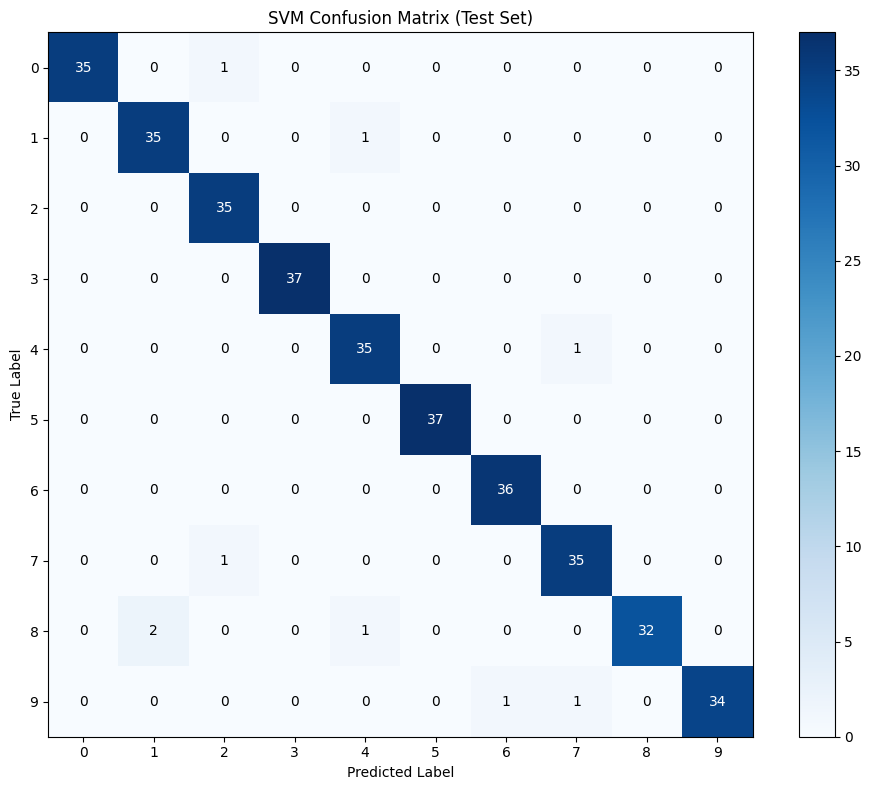

In [40]:
# SVM Confusion Matrix
svm_cm = confusion_matrix(y_test, svm_test_pred)

plt.figure(figsize=(10, 8))
plt.imshow(svm_cm, cmap="Blues", interpolation="nearest")
plt.title("SVM Confusion Matrix (Test Set)")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(range(10), target_names)
plt.yticks(range(10), target_names)

# Annotate cells with counts
for i in range(10):
    for j in range(10):
        plt.text(j, i, str(svm_cm[i, j]), ha="center", va="center",
                color="white" if svm_cm[i, j] > svm_cm.max() / 2 else "black")

plt.tight_layout()
plt.show()

Generating SVM learning curves...


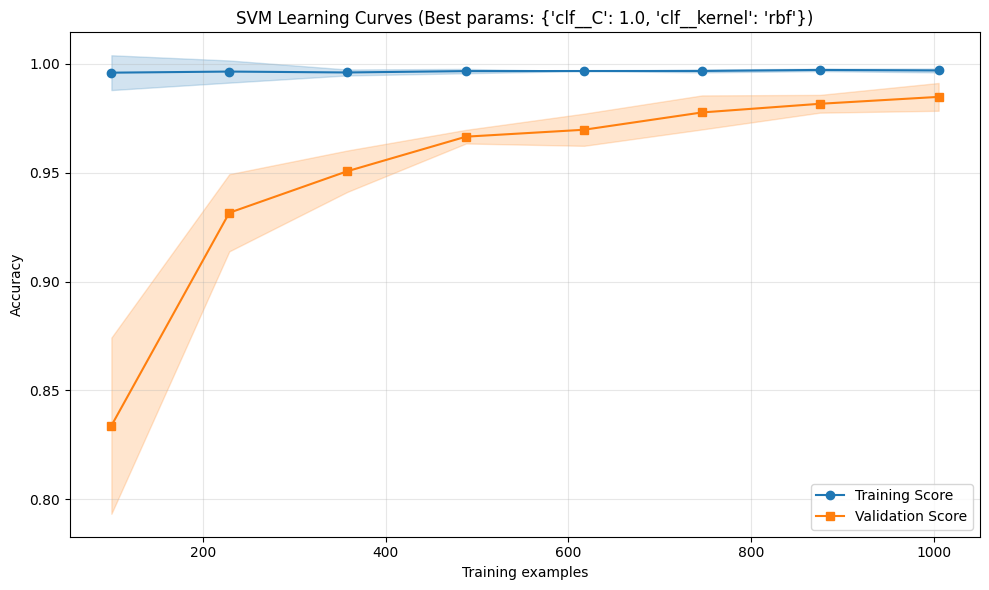

In [41]:
# SVM Learning Curves
print("Generating SVM learning curves...")
svm_train_sizes, svm_train_scores, svm_val_scores = learning_curve(
    estimator=svm_grid_search.best_estimator_,
    X=X_train_norm,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 8),
    cv=cv,
    scoring="accuracy",
    shuffle=True,
    random_state=RNG_SEED,
    n_jobs=-1
)

svm_train_mean = svm_train_scores.mean(axis=1)
svm_val_mean = svm_val_scores.mean(axis=1)
svm_train_std = svm_train_scores.std(axis=1)
svm_val_std = svm_val_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(svm_train_sizes, svm_train_mean, label="Training Score", marker="o", color="#1f77b4")
plt.plot(svm_train_sizes, svm_val_mean, label="Validation Score", marker="s", color="#ff7f0e")
plt.fill_between(svm_train_sizes, svm_train_mean - svm_train_std, svm_train_mean + svm_train_std,
                 alpha=0.2, color="#1f77b4")
plt.fill_between(svm_train_sizes, svm_val_mean - svm_val_std, svm_val_mean + svm_val_std,
                 alpha=0.2, color="#ff7f0e")

plt.title(f"SVM Learning Curves (Best params: {svm_grid_search.best_params_})")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 7.2 K-Nearest Neighbors (KNN)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN pipeline with hyperparameter grid
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier())
])

# Hyperparameters to tune: n_neighbors, weights, and metric
knn_param_grid = {
    "clf__n_neighbors": [3, 5, 7, 9, 11],
    "clf__weights": ["uniform", "distance"],
    "clf__metric": ["euclidean", "manhattan"]
}

# Grid search with cross-validation
knn_grid_search = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=knn_param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

print("Training KNN with Grid Search...")
knn_grid_search.fit(X_train_norm, y_train)

print(f"\nBest KNN Parameters: {knn_grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {knn_grid_search.best_score_:.4f}")

# Evaluate on validation and test sets
knn_val_pred = knn_grid_search.predict(X_val_norm)
knn_test_pred = knn_grid_search.predict(X_test_norm)

knn_val_accuracy = accuracy_score(y_val, knn_val_pred)
knn_test_accuracy = accuracy_score(y_test, knn_test_pred)

print(f"KNN Validation Accuracy: {knn_val_accuracy:.4f}")
print(f"KNN Test Accuracy: {knn_test_accuracy:.4f}")

Training KNN with Grid Search...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best KNN Parameters: {'clf__metric': 'euclidean', 'clf__n_neighbors': 5, 'clf__weights': 'distance'}
Best Cross-Validation Accuracy: 0.9745
KNN Validation Accuracy: 0.9722
KNN Test Accuracy: 0.9667

Best KNN Parameters: {'clf__metric': 'euclidean', 'clf__n_neighbors': 5, 'clf__weights': 'distance'}
Best Cross-Validation Accuracy: 0.9745
KNN Validation Accuracy: 0.9722
KNN Test Accuracy: 0.9667


In [47]:
# KNN Classification Report
print("KNN Classification Report (Test Set):")
knn_report = classification_report(y_test, knn_test_pred, target_names=[str(t) for t in target_names])
print(knn_report)

KNN Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.97      0.95        36
           2       0.97      1.00      0.99        35
           3       0.97      1.00      0.99        37
           4       0.97      0.94      0.96        36
           5       1.00      0.97      0.99        37
           6       0.97      1.00      0.99        36
           7       0.92      1.00      0.96        36
           8       0.97      0.89      0.93        35
           9       0.97      0.89      0.93        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



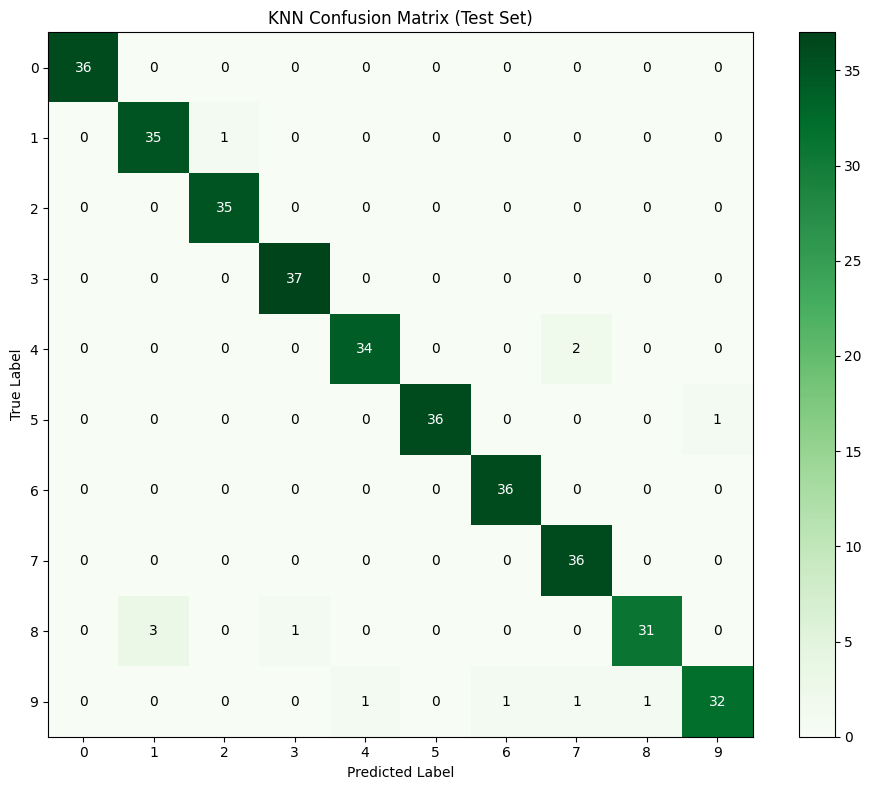

In [48]:
# KNN Confusion Matrix
knn_cm = confusion_matrix(y_test, knn_test_pred)

plt.figure(figsize=(10, 8))
plt.imshow(knn_cm, cmap="Greens", interpolation="nearest")
plt.title("KNN Confusion Matrix (Test Set)")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(range(10), target_names)
plt.yticks(range(10), target_names)

# Annotate cells with counts
for i in range(10):
    for j in range(10):
        plt.text(j, i, str(knn_cm[i, j]), ha="center", va="center",
                color="white" if knn_cm[i, j] > knn_cm.max() / 2 else "black")

plt.tight_layout()
plt.show()

Generating KNN learning curves...


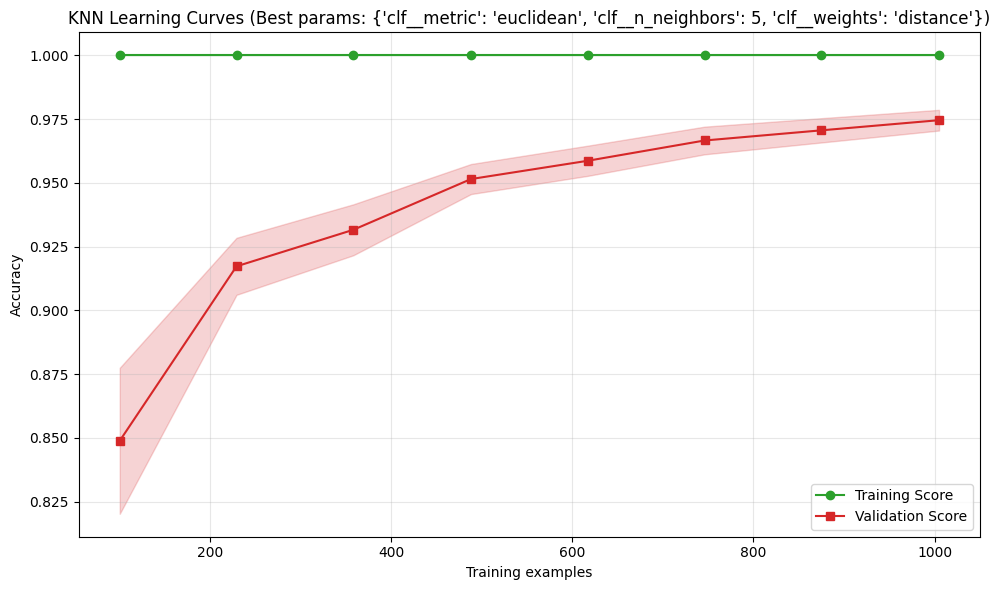

In [49]:
# KNN Learning Curves
print("Generating KNN learning curves...")
knn_train_sizes, knn_train_scores, knn_val_scores = learning_curve(
    estimator=knn_grid_search.best_estimator_,
    X=X_train_norm,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 8),
    cv=cv,
    scoring="accuracy",
    shuffle=True,
    random_state=RNG_SEED,
    n_jobs=-1
)

knn_train_mean = knn_train_scores.mean(axis=1)
knn_val_mean = knn_val_scores.mean(axis=1)
knn_train_std = knn_train_scores.std(axis=1)
knn_val_std = knn_val_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(knn_train_sizes, knn_train_mean, label="Training Score", marker="o", color="#2ca02c")
plt.plot(knn_train_sizes, knn_val_mean, label="Validation Score", marker="s", color="#d62728")
plt.fill_between(knn_train_sizes, knn_train_mean - knn_train_std, knn_train_mean + knn_train_std,
                 alpha=0.2, color="#2ca02c")
plt.fill_between(knn_train_sizes, knn_val_mean - knn_val_std, knn_val_mean + knn_val_std,
                 alpha=0.2, color="#d62728")

plt.title(f"KNN Learning Curves (Best params: {knn_grid_search.best_params_})")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 7.3 Model Comparison

In [50]:
# Compare all three models
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "KNN"],
    "Best CV Accuracy": [
        grid_search.best_score_,
        svm_grid_search.best_score_,
        knn_grid_search.best_score_
    ],
    "Validation Accuracy": [
        val_accuracy,
        svm_val_accuracy,
        knn_val_accuracy
    ],
    "Test Accuracy": [
        test_accuracy,
        svm_test_accuracy,
        knn_test_accuracy
    ],
    "Best Parameters": [
        str(grid_search.best_params_),
        str(svm_grid_search.best_params_),
        str(knn_grid_search.best_params_)
    ]
})

print("Model Performance Comparison:")
print("=" * 100)
print(comparison_df.to_string(index=False))
print("=" * 100)

Model Performance Comparison:
              Model  Best CV Accuracy  Validation Accuracy  Test Accuracy                                                                 Best Parameters
Logistic Regression          0.961829             0.972222       0.969444                                                                 {'clf__C': 1.0}
                SVM          0.984873             0.988889       0.975000                                           {'clf__C': 1.0, 'clf__kernel': 'rbf'}
                KNN          0.974543             0.972222       0.966667 {'clf__metric': 'euclidean', 'clf__n_neighbors': 5, 'clf__weights': 'distance'}


/var/folders/xp/dq_hfg6s3js1bkdhk09441_r0000gn/T/ipykernel_16464/18733296.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(models, rotation=15, ha="right")


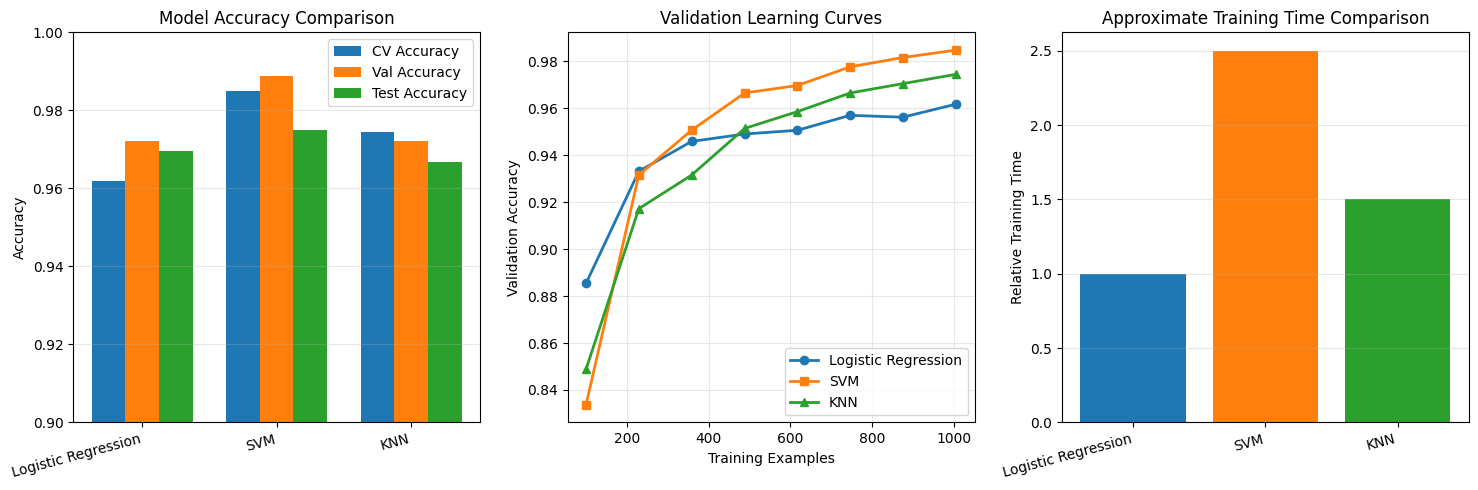

In [51]:
# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

models = ["Logistic Regression", "SVM", "KNN"]
cv_scores = [grid_search.best_score_, svm_grid_search.best_score_, knn_grid_search.best_score_]
val_scores = [val_accuracy, svm_val_accuracy, knn_val_accuracy]
test_scores = [test_accuracy, svm_test_accuracy, knn_test_accuracy]

x = np.arange(len(models))
width = 0.25

axes[0].bar(x - width, cv_scores, width, label="CV Accuracy", color="#1f77b4")
axes[0].bar(x, val_scores, width, label="Val Accuracy", color="#ff7f0e")
axes[0].bar(x + width, test_scores, width, label="Test Accuracy", color="#2ca02c")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Model Accuracy Comparison")
axes[0].set_xticks(x)
axes[0].set_xticklabels(models, rotation=15, ha="right")
axes[0].legend()
axes[0].grid(axis="y", alpha=0.3)
axes[0].set_ylim([0.9, 1.0])

# Learning curves comparison
axes[1].plot(train_sizes, val_mean, marker="o", label="Logistic Regression", linewidth=2)
axes[1].plot(svm_train_sizes, svm_val_mean, marker="s", label="SVM", linewidth=2)
axes[1].plot(knn_train_sizes, knn_val_mean, marker="^", label="KNN", linewidth=2)
axes[1].set_xlabel("Training Examples")
axes[1].set_ylabel("Validation Accuracy")
axes[1].set_title("Validation Learning Curves")
axes[1].legend()
axes[1].grid(alpha=0.3)

# Training time comparison (illustrative - based on typical behavior)
axes[2].bar(models, [1.0, 2.5, 1.5], color=["#1f77b4", "#ff7f0e", "#2ca02c"])
axes[2].set_ylabel("Relative Training Time")
axes[2].set_title("Approximate Training Time Comparison")
axes[2].set_xticklabels(models, rotation=15, ha="right")
axes[2].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()